In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../csvFiles/Salary_Data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

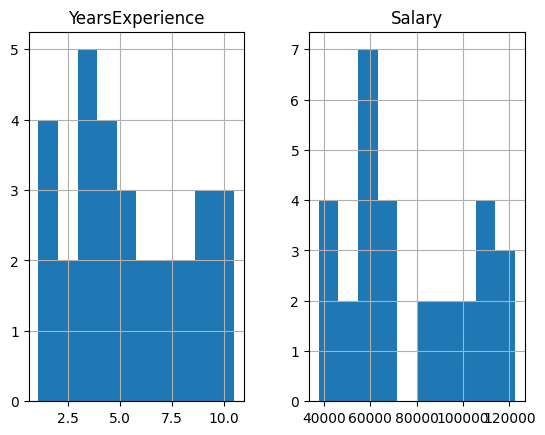

In [5]:
data.hist()

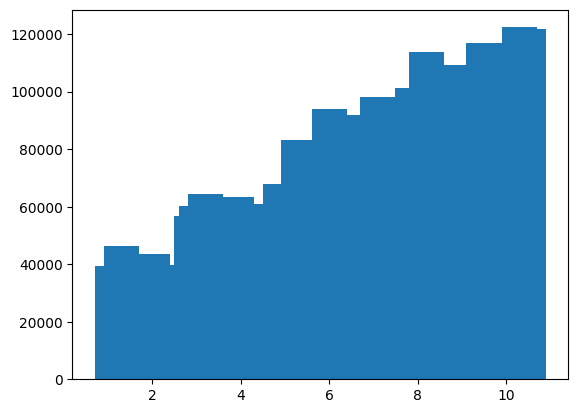

In [6]:
plt.bar(data["YearsExperience"], data["Salary"])
plt.show()

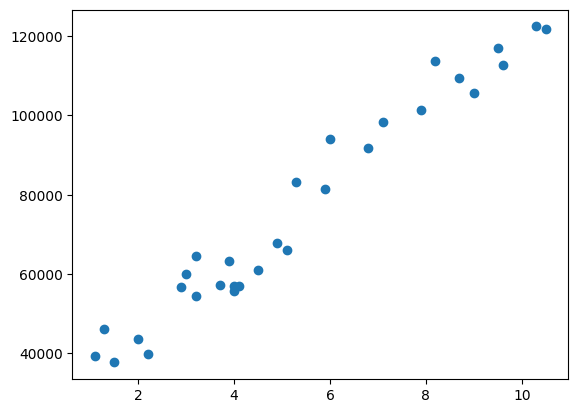

In [7]:
plt.scatter(data["YearsExperience"], data["Salary"])


# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
model = LinearRegression()
x = data['YearsExperience'].values
print(type(x))
print(x)
x = x.reshape(-1, 1)
y = data['Salary']

<class 'numpy.ndarray'>
[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [31]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42)
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7]])

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
print("R2_score: ", r2_score(y_test, y_pred))

R2_score:  0.9347210011126782


In [39]:
model.score(X_test, y_test)

0.9347210011126782

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
x_poly = poly.fit_transform(X_train)
x_poly

array([[1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03, 1.63840000e+04,
        6.55360000e+04, 2.62144000e+05, 1.04857600e+06],
       [1.00000000e+00, 1.10000000e+00, 1.21000000e+00, 1.33100000e+00,
        1.46410000e+00, 1.61051000e+00, 1.77156100e+00, 1.94871710e+00,
        2.14358881e+00, 2.35794769e+00, 2.59374246e+00],
       [1.00000000e+00, 2.20000000e+00, 4.84000000e+00, 1.06480000e+01,
        2.34256000e+01, 5.15363200e+01, 1.13379904e+02, 2.49435789e+02,
        5.48758735e+02, 1.20726922e+03, 2.65599228e+03],
       [1.00000000e+00, 5.10000000e+00, 2.60100000e+01, 1.32651000e+02,
        6.76520100e+02, 3.45025251e+03, 1.75962878e+04, 8.97410678e+04,
        4.57679446e+05, 2.33416517e+06, 1.19042424e+07],
       [1.00000000e+00, 2.90000000e+00, 8.41000000e+00, 2.43890000e+01,
        7.07281000e+01, 2.05111490e+02, 5.94823321e+02, 1.72498763e+03,
        5.00246413e+03, 1.45071460e+04, 4.20707233e+

In [42]:
polyReg = LinearRegression()
polyReg.fit(x_poly, y_train)

LinearRegression()

In [44]:
x_test_poly = poly.fit_transform(X_test)
y_predict_poly = polyReg.predict(x_test_poly)

In [45]:
r2_score(y_test, y_predict_poly)

0.8417950457589091

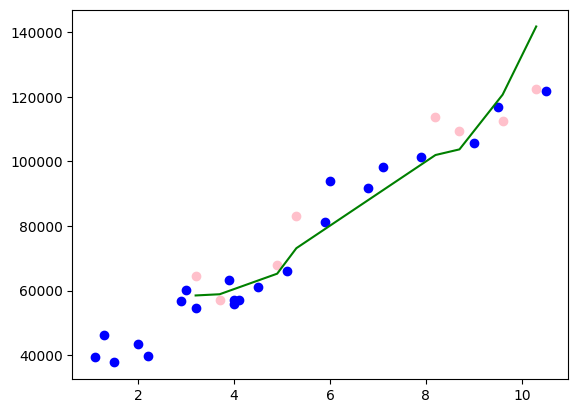

In [56]:
plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test,color="pink")
plt.plot(sorted(X_test), sorted(y_predict_poly),color="green")
plt.show()

## Find the optimum degree...

In [53]:
polyReg = LinearRegression()

for i in range(1, 15):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X_train)
    polyReg.fit(x_poly, y_train)
    print(i, polyReg.score(poly.fit_transform(X_test), y_test))
    
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(X_train)
polyReg.fit(x_poly, y_train)
print(6, polyReg.score(x_poly, y_train))

1 0.9347210011126781
2 0.9316243309827186
3 0.9377124553685535
4 0.9366386906872579
5 0.938958562760202
6 0.9413403370678055
7 0.9004399101103534
8 0.8718281885265103
9 0.8847595607116824
10 0.8417950457589091
11 0.6587260190196843
12 0.5630418443591252
13 0.9098871351975695
14 -4.484365576452133
6 0.9673402443140824
